In [1]:
import sys, gc

sys.path.append('..')

from scripts.sae.train_sae import *
from scripts.sae.infer_sae import *

from utils.utils import *
from utils.config import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Us

In [2]:
datasets = ["imdb", "spotify", "news"]

labels = [2, 5, 5]

sel_idx = 0

layers = [3, 6, 12]

layer_idx = layers[0]

dataset_name, num_labels = datasets[sel_idx], labels[sel_idx]

model_name = "bert-base-uncased"

In [3]:
ft = True

model, tokenizer = load_model_tok(
    dataset_name=dataset_name,
    model_name=model_name,
    num_labels=num_labels,
    ft=ft,
)

autoencoder, activations, labels = load_sae(
    dataset_name=dataset_name,
    model_name=model_name,
    layer_idx=layer_idx,
    ft=ft,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading fine-tuned model...
Loading fine-tuned autoencoder...
Loading fine-tuned activations...


In [4]:
features = extract_features(
    autoencoder=autoencoder,
    activations=activations,
)

In [5]:
top_features_indices, top_features_variances = get_top_features(features, 3)

top_features_indices

tensor([1015,  898,  862], device='cuda:0')

In [6]:
feature_idx = 1015

top_examples = get_top_examples(
    feature_idx=feature_idx,
    features=features,
    dataset_name=dataset_name,
    layer_idx=layer_idx,
    top_k=-1,
)

c:\Me\Duke\Anthropic\gptune\notebooks\..\scripts\sae\infer_sae.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="label", y="activations", palette="Set2")


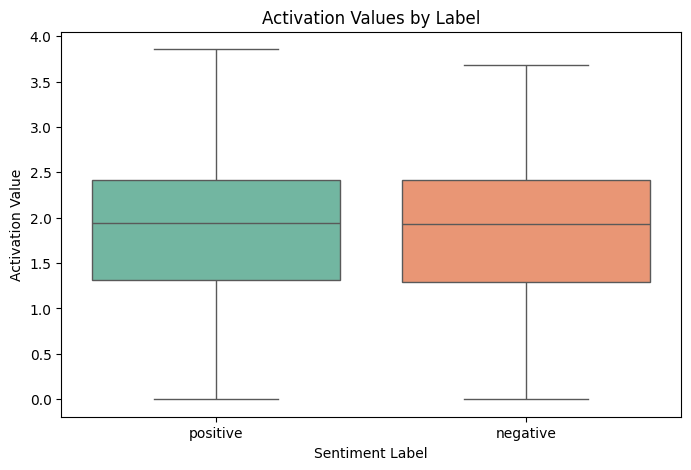

Activation Statistics by Label:
      label      mean       std
0  negative  1.849788  0.719763
1  positive  1.860697  0.720371

Top 5 Activating Sentences for Label: positive


,activations,text
0,3.855925,"Paul Reiser did a spectacular job in writing this movie. Peter Falk gives the performance of his life. It is worthy of an Academy Award. This was one of the most poignant and funny movies of the year. Reiser's wit is fantastic and he is as good as it gets and as he was in his long running TV sitcom ""Mad about You"". Peter Falk did a masterful job as his dad, and Peter who is now 78 years young made us laugh and cry at the same time. The supporting cast was equal to the task especially the gorgeous gorgeous Elizabeth Perkins. It is a must see movie for 2005. We bet that everyone across all ages and religions will love this movie and somehow relate to it in one way or another. We have mothers and fathers and siblings like these in the movie. We have all had the good and bad times together and wish things were the same but different."
1,3.730934,"I have watched this episode more often than any other TFTC episode, it is that enjoyable. And it is quite scary, but all in good, ghoulish fun. A woman kills her 2nd husband but runs into a problem when an escaped maniac in a ragged Santa Claus outfit decides to pay her and her little girl a visit at that very moment. Mary Traynor, who I seem to remember from SNL or some other TV comedy skit show, is the evil wife, and Larry Drake plays the lunatic in the dingy Santa outfit. I had forgotten Santa was played by Drake over the years. His Santa is an unstoppable force and quite frightening at times. You can probably guess how Santa finally gets into the house. The episode is played for laughs, but it also can be pretty intense at times."
3,3.634600,<br /><br />Robot jox is a great little film ok some of the sets are bad and the acting is not that great but the special effects are very good for a film of this size and age. You have to remember that this film is over 10 years old now and was made very cheaply in the 1st place so you cant moan to much about the bad parts. So just sit back and watch a cool film with great big robots in it.
4,3.634274,"I was a little afraid when I went to the cinema to see this movie. Indeed, it is always tough to make a movie from a comics and the first episode of the adventures of the French two greatest heroes was good but not fantastic. Finally, it is very funny from the beginning to the end with unexpected gags, some cartoon scenes, no timeouts, great FX, a great cast, great landscapes, great everything !!!<br /><br />However, I wonder how they will manage to translate all the French names in English or German, because it is certainly funny in French but how will it be in another language ???"
5,3.625016,"This movie turned out to be pretty much what I expected. Of course it's sappy, of course it's predictable. We all know the fairytale. But knowing that when you go to watch it, it's enjoyable enough to watch. It was funny and sweet. I did find it annoying that they showed geeks as either kids who didn't wash there hair or kids who loved math and joined clubs about math and wore T-shirts about math. I was an outcast in high school and I didn't do these things. It goes much deeper than that. Having to do with many things, some of that being how much money your family has, how much you are willing to hide your uniqueness and how mean you are willing to be to other kids. Anyway, I won't get into it. I don't agree with other opinions that Drew isn't convincing as a geek. With braces, no make-up and unwashed hair, I don't think too many people would be drooling over her. And even when she goes back to high-school and sheds those things. She's still wearing the ""wrong"" clothes, ""wrong"" hair and has the ""wrong"" attitude to be considered cool. And her other ""geek"" friend may be beautiful but it doesn't matter, where I come from, you can still be an outcast and be beautiful. (inside and out)"



Top 5 Activating Sentences for Label: negative


,activations,text
2,3.682285,"This movie wastes virtually every actor's talents in what could best be charitably called a ""potboiler"".<br /><br />Despite it's action-packed 'Top Gun' opening it is all downhill from there with plenty of stereotypes and unlikely situations following each other until you try to choke yourself on your popcorn.<br /><br />There are so many dead-end story lines in this movie I was guessing at one point it was made by splicing together a discarded TV series.<br /><br />Quinn's Mexican drug-lord role is laughable and his 'associates' plucked right out of a 1970's Quinn-Martin cop show. Costner's character is wooden and gives us no reason to believe he actually fell in love with Mendez' wife. Nor are we convincingly led to believe the wife is aching for companionship and will jump the first hot body coming along.<br /><br />Definitely a 'B' movie at best and a huge waste of time for everyone involved."
6,3.606454,"I can't remember the worst film I have watched.Total waste of actors and audience time.If you prefer sitting by your TV and think when will be this film over,then this is the right film for you.Maybe this film is recorded to make people believe that Moscow has some mystique past. But I must say I have not expect anything else from Rade Serbedzija,but I have expected more from Vincent Gallo.The film lacks a plot, character,development,denouement.Entire movie is about underground tunnels and how they are mystique.I must be fair there is some camera effect but even that is too poor.Over and over are the same pictures.Total waste of time."
8,3.581191,"Purchased this film for one dollar and figured I could never go wrong, my big mistake was watching it. Enjoyed the acting of Ice-T and the rapping which gave lots of class to this film about Los Angeles and the world of pimps. There is a boxer who kills one of his opponents in a practice ring and who has a career, but because of mental problems from childhood and the killing of this other boxer he retires. He gets hired by a pimp who is looking for a bodyguard to protect the girls that work for him at their trade and make sure they are not beaten up. This boxer falls in love with the boss's girlfriend and all kinds of trouble starts. This is entertaining and it then becomes a big laughing comedy."
12,3.544043,"I went to see ""Passion of Mind"" because I usually get a kick out of the genre of alternate reality romances, i.e. ""Sliding Doors,"" ""Me, Myself, I,"" etc. <br /><br />But this was the worst one I've ever seen! I had to force myself to sit through it. I didn't even stay through the credits which is unheard of for me.<br /><br />The magical realism was completely missing because Demi Moore was grim and the lovers she was two-timing were guys who usually play villains, though each was kind of sexy and appealing.<br /><br />There was actually a psychological explanation provided for the dual lives, with a distasteful frisson of The Elektra Complex; maybe the magic shouldn't be explained for this genre to work.<br /><br />(originally written 5/28/2000)"
14,3.536854,This is a weak film with a troubled history of cuts and re-naming. It doesn't work at all. Firstly the dramaturgy is all wrong. It's very slow moving at first and then hastily and unsatisfactorily moves to an end. But there is also (and that may have to do with the cuts) an uneasy moving between genres. It starts off with being a thriller to be taken at face value and then degenerates into a farce rather than satire. the ending may be funny but it's also so blunt that I almost felt it insulted my intelligence (what little there is). So the film tries to be everything but does not really succeed on any level at all. You can also see that in the very unsteady character development.You almost get the impression Connery plays three roles rather than one.


Max activation value: 3.8559250831604004
Min activation value: 0.0


In [7]:
analyze_activations(top_examples, 5)

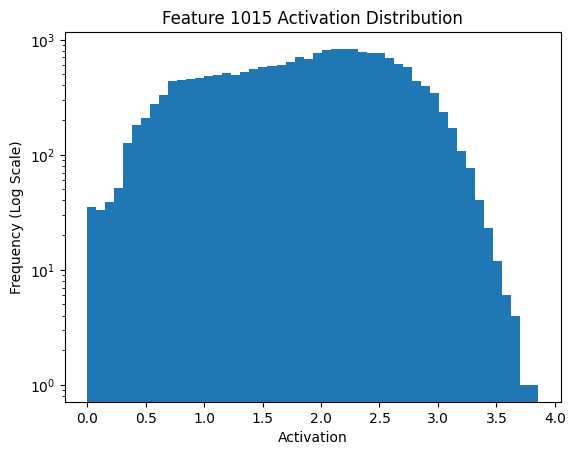

In [8]:
plot_activation(features, feature_idx=feature_idx)

In [9]:
top_features_indices

tensor([1015,  898,  862], device='cuda:0')

In [10]:
sentence = """
The director of this movie is terrible.
"""

act_dict = token_level_activations(sentence=sentence, autoencoder=autoencoder, model=model, feature_idx=1015, layer_idx=layer_idx, tokenizer=tokenizer)

c:\Users\91939\.conda\envs\base_env\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [11]:
act_dict

[{'Token': '[CLS]', 'Activation': 0.359},
 {'Token': 'the', 'Activation': 1.735},
 {'Token': 'director', 'Activation': 2.689},
 {'Token': 'of', 'Activation': 1.639},
 {'Token': 'this', 'Activation': 1.895},
 {'Token': 'movie', 'Activation': 2.495},
 {'Token': 'is', 'Activation': 1.918},
 {'Token': 'terrible', 'Activation': 0.854},
 {'Token': '.', 'Activation': 0.487},
 {'Token': '[SEP]', 'Activation': 0.184}]

In [12]:
# for ds_idx, dataset in enumerate(datasets):
#     for layer_idx, layer in enumerate(layers):
        
#         dataset_name = dataset

#         model, tokenizer = load_model_tok(
#             dataset_name=dataset_name,
#             model_name=model_name,
#             num_labels=2,
#             ft=True,
#         )

#         train_loader, val_loader = load_and_preprocess_data(dataset_name=dataset_name, tokenizer=tokenizer)

#         activations, labels = extract_activations(model, train_loader, dataset_name, model_name, layer_idx)

#         train_sae(activations=activations, dataset_name=dataset_name, model_name=model_name, layer_idx=layer_idx, ft=True)

#     del autoencoder, activations, labels

#     torch.cuda.empty_cache()

#     gc.collect()